In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from data_des_ import data_des
warnings.filterwarnings('ignore')

In [2]:
# create names_list to save cols names , and assign it to the Df
names_list =[]
for key in data_des:
    names_list.append(key)
    
# read the data with names_list 
df = pd.read_excel("../Data/Dataset.xlsx",names=names_list)
df


,gender,age,education,major,regions,eservice_usage,device_skill_level,freq_used,connection_type,used_purpose,...,education_responsible,other_responsible,government_role,victim,when_being_victim,contact_to_victim,not_victim,not_victim_would_like_to_report,not_victim_aggree_to_report,not_victim_not_aggree_to_report
0,Female,18-29,"Postgraduate (Master’s, PhD)",Computer Science,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone",Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,Strongly Agree,NaN,No role,Yes,No,NaN,I think that there is no value of reporting,"No, I would not",NaN,I do not know what the crime means
1,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,"Private Wi-Fi (e.g. in your home), Mobile/cell...","Social networks, Communication",...,Agree,NaN,Monitor organisations misusing consumer inform...,No,NaN,NaN,NaN,"Yes, I would","Saudi eGovernment Portal , Saudi CERT",NaN
2,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Tablet,Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, C...",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,Yes,Yes,Bank,NaN,"No, I would not",NaN,Not sure
3,Female,18-29,"Undergraduate (Diploma, BSc)",Medicine or public health,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone","Public Wi-Fi (e.g. in coffee shop), Private Wi...","Professional reasons, Education, Social networ...",...,Disagree,NaN,Don’t know,No,NaN,NaN,NaN,"No, I would not",NaN,Not sure
4,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,NaN,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Desktop, Laptop, Smartphone","Private Wi-Fi (e.g. in your home), Mobile/cell...","Education, Social networks, Online services, E...",...,Strongly Agree,NaN,No role,Yes,No,NaN,I did not know how to describe or write report...,"No, I would not",NaN,I will fix the problem by myself
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,"Beginner/Basic (e.g. start computer and phone,...",Smartphone,Mobile/cellular phone network (e.g. 3G/4G),"Education, Social networks, Online services, ...",...,Agree,NaN,Work towards providing a global cyber security...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN
1227,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,"Laptop, Smartphone",Mobile/cellular phone network (e.g. 3G/4G),"Professional reasons , Education, Social ne...",...,Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN
1228,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,Mobile/cellular phone network (e.g. 3G/4G),"Social networks , Online services , Entertainment",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Police,NaN
1229,Male,18-29,"Undergraduate (Diploma, BSc)",Engineering,Makkah,Frequently throughout the day,Intermediate (e.g. able to install and run spe...,Smartphone,"Mobile/cellular phone network (e.g. 3G/4G), Pr...","Social networks , Online services, Entertainme...",...,Strongly Agree,NaN,Have stricter laws and punishments for cyber c...,No,NaN,NaN,NaN,"Yes, I would",Don’t know but will ask friends for advice,NaN


In [3]:
# see the number of missing values, we have 7164
df.isna().sum().sum()

7164

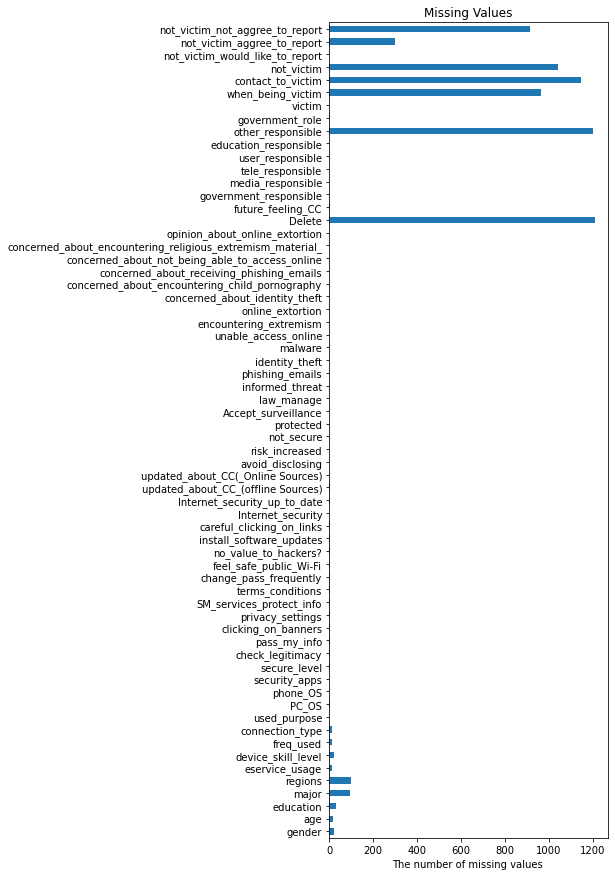

In [4]:
plt.subplots(figsize=(5,15))
df.isnull().sum().plot(
    kind="barh"
)

plt.title("Missing Values")
plt.xlabel("The number of missing values ") # x axis label
plt.show()

In [5]:
#we will drop the columns that with 60% missing values and more , because they do not have enough data
# 60*1231 =>  73860 / 100 => 739
# from 64 => 58 cols 
df = df.loc[:,df.isna().sum() < 739]
# here because not_victim_aggree_to_report is a part of previous question 
# Also, has so many missing value that near from 60% , so we diced to delete it 
del df["not_victim_aggree_to_report"]
# drop the rows that null which are 206
# so , we lost 206 records
df=df.dropna()
print(df.shape)
print(df.isna().sum().sum())

(1025, 57)
0


In [6]:
# uncomment the loop in the cell to see the issues with some values 
# check the santy checks , data entry error

#for x in df:
    #print(df[x].value_counts())

In [7]:
# from above we can see , we have many trouble with whitespaces 
# espacillay with the following cols. 

# df["education"].value_counts()
# df["major"].value_counts()
# df["freq_used"].value_counts()
# df["phone_OS"].value_counts()

# so , reomve whitespaces from start and end each word or sentence in every column 

# remove whitespaces
for x in df:
    df[x] = df[x].str.strip() 

In [8]:
# No here we have no data entry for some values in 

df["major"].value_counts()
df["education"].value_counts()

Undergraduate (Diploma, BSc)    744
Postgraduate (Master’s, PhD)    167
High School                     110
Middle School                     3
                                  1
Name: education, dtype: int64

In [9]:
# so , to deal with it , we fill it with the mode
df['education'] = df['education'].replace('', np.nan).fillna(df['education'].mode()[0])
df['major'] = df['major'].replace('', np.nan).fillna(df['major'].mode()[0])

In [10]:
# rename some values , in two columns 
df['future_feeling_CC'].replace("They will become a more serious issue in the future","serious issue",inplace=True)
df['future_feeling_CC'].replace("The threat will vanish eventually","vanish eventually",inplace=True)
df['future_feeling_CC'].replace("No significant change","no change",inplace=True)


df['government_role'].replace("Have stricter laws and punishments for cyber crimes","strict laws and punishments",inplace=True)
df['government_role'].replace("Work towards providing a global cyber security framework","global cyber security",inplace=True)
df['government_role'].replace("Make people aware of cyber crime","public awareness",inplace=True)
df['government_role'].replace("Monitor organisations misusing consumer information","monitor organisations",inplace=True)


In [11]:
#rename some values and create some new columns that might help for EDA and modling

df["age"] = df["age"].replace(['18-29','30-39','40-49','50+'],["Early adulthood","Adult","Mature adulthood","Mature adulthood"])
#3 column
df["education"] = df["education"].replace(['Undergraduate (Diploma, BSc)','Postgraduate (Master’s, PhD)'],
                                          ["Undergraduate","Postgraduate"])

#4 column
major = ["Computer Science","Biotechnology","Software Engineering","Information System","Information Technology"]
df["new_major"]=df["major"]
df.loc[(~df["new_major"].isin(major)),'new_major']='Not Technical'
df.loc[(df["new_major"].isin(major)),'new_major']='Technical'
df["new_major"].value_counts()

#5 column
Western_Province = ["Makkah","Madina"]# west
Northern_Province = ["Tabuk","Aljawf","Ha'il","Northern Borders","Tabuk","Aljawf"]#north
Southern_Province = ["Asir","Jazan","Baha","Najran"]#south
Central_Province = ["Riyadh","Qassim"]#center
df["new_ragions"]=df["regions"]
df.loc[(df["new_ragions"].isin(Western_Province)),'new_ragions']='Western_Province'
df.loc[(df["new_ragions"].isin(Northern_Province)),'new_ragions']='Northern_Province'
df.loc[(df["new_ragions"].isin(Southern_Province)),'new_ragions']='Southern_Province'
df.loc[(df["new_ragions"].isin(Central_Province)),'new_ragions']='Central_Province'

#6 column
df["eservice_usage"] = df["eservice_usage"].replace(['Frequently throughout the day','Once or twice a day','Less frequently (once a week, once month)'],["Frequently","Once a day","Once a week"])
#7 column
df["device_skill_level"] = df["device_skill_level"].str.split("(",n = 1, expand = True)[0]
df["device_skill_level"] = df["device_skill_level"].replace(["Beginner/Basic ","Intermediate ","Expert"],
                                                            ["Beginner","Intermediate","Expert"])

#8 column ask about categoriz
df["freq_used"]=df["freq_used"].str.split(',').str.len()
df["freq_used"].astype("int")
df["freq_used"].value_counts()
#9 column
df["connection_type"] = df["connection_type"].str.split("(",n = 1, expand = True)[0]
df["connection_type"] = df["connection_type"].replace(['Broadband ','Mobile/cellular phone network '],
                                                      ["Private Wi-Fi","Cellular network"])
df["connection_type"] = df["connection_type"].replace(['Private Wi-Fi ','Public Wi-Fi '],
                                                      ["Private Wi-Fi","Public Wi-Fi"])
#10 column ask about categoriz
df["used_purpose"]=df["used_purpose"].str.split(',').str.len()
df["used_purpose"].astype("int")
df["used_purpose"].value_counts()
#11 column
df['PC_OS'] = df['PC_OS'].replace('', np.nan).fillna(df['PC_OS'].mode()[0])
df["PC_OS"] = df["PC_OS"].str.split(",",n = 1, expand = True)[0]
df["PC_OS"] = df["PC_OS"].replace(['Windows 10','Windows 7','Windows 8','Old Windows version'],["Windows","Windows","Windows","Windows"])
#12 column 
df["phone_OS"] = df["phone_OS"].str.split(",",n = 1, expand = True)[0]
#13 column
# df['security_apps'] = df.security_apps.str.replace('(e.g. password, PIN) ?' , '')
# df['security_apps'] = df.security_apps.str.replace('() ?' , '')
# df["security_apps"]=df["security_apps"].str.split(',').str.len()
#14 column
df["secure_level"] = df["secure_level"].replace(['Somewhat secure','Somewhat insecure','Not secure at all'],
                                                ["Very secure","Not secure","Not secure"])
df["secure_level"] = df["secure_level"].str.split("(",n = 1, expand = True)[0]



In [12]:
#rename some values and create some new columns that might help for EDA and modling

# Internet_security column 
df["Internet_security"]=df["Internet_security"].replace(["I don't know","None of the above"],np.nan)\
.str.split(',')\
.str.len()\
.replace(np.nan,0)\
.astype(int)

#Internet_security_up_to_date
df['Internet_security_up_to_date']=df['Internet_security_up_to_date'].replace([
    "Yes, I believe it is automatically updated",
    "Yes, I manually updated",
    "No, I think it is automatically updated"],[
    "Yes",
    "Yes",
    "No"] )




# updated_about_CC_(offline Sources)
l1={
    1:'No',
    2:'No',
    3:'Yes',
    4:'Yes',
    5:'Yes',
    6:'Yes',
    7:'Yes',
    8:'Yes',
    9:'Yes',
    10:'Yes'
}

df['updated_about_CC_(offline Sources)_2']=df['updated_about_CC_(offline Sources)']\
.str.split(',')\
.str.len()\
.map(l1)

#updated_about_CC(_Online Sources)

l2={
    1:'No',
    2:'No',
    3:'Yes',
    4:'Yes',
    5:'Yes',
    6:'Yes',
    7:'Yes',
    8:'Yes',
    9:'Yes',
    10:'Yes',
    11:'Yes'
}

df['updated_about_CC(_Online Sources)_2']=df['updated_about_CC(_Online Sources)']\
.str.split(',')\
.str.len()\
.map(l2)



In [13]:
# uncomment the code to save the new cleaned data for modling
# Save our df to csv
# df.to_csv("../Data/cleaned.csv", index=False)